In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [37]:
all_df = pd.read_excel(r"directProductPerformance.xlsx",sheetname="All users")
all_df['Product Revenue'] = all_df['Product Revenue'].round(decimals=2)
all_df.drop(["Avg. Price","Avg. QTY"],axis=1,inplace=True)
all_df.head()

,Product,Type,Year,Product Revenue,Unique Purchases,Quantity
0,Montreal-Holguin-PARADISUS RIO DE ORO RESORT A...,Forfait,2017,57320.00,18,36
1,Montreal-Holguin-PARADISUS RIO DE ORO RESORT A...,Forfait,2016,0.00,0,0
2,Montreal-Paris,Vol,2017,52745.22,34,58
3,Montreal-Paris,Vol,2016,30194.42,25,36
4,CAA Plus,Nouvelle-adhésion,2017,36545.85,233,233


In [38]:
fusionlist = ["Adhésion-cadeau-nonmembre","Ajout-modification","Nouvelle-adhésion","Renouvellement",
              "adhésion-associe-cadeau-membre", "adhésion-cadeau-membre"]
def rename(name):
    if name in fusionlist:
        return "CAA Membership"
    else:
        return name

all_df["Type"] = all_df["Type"].apply(rename)
all_df["Type"].unique()

array(['Forfait', 'Vol', 'CAA Membership'], dtype=object)

In [39]:
direct_df = pd.read_excel(r"directProductPerformance.xlsx",sheetname="Direct")
direct_df['Product Revenue'] = direct_df['Product Revenue'].round(decimals=2)
direct_df.drop(["Avg. Price","Avg. QTY"],axis=1,inplace=True)
direct_df.head()

,Product,Type,Year,Product Revenue,Unique Purchases,Quantity
0,Montreal-Varadero-IBEROSTAR LAGUNA AZUL,Forfait,2017,193101.34,47,190
1,Montreal-Varadero-IBEROSTAR LAGUNA AZUL,Forfait,2016,0.00,0,0
2,Montreal-Cancun-GRAND SUNSET PRINCESS ALL SUIT...,Forfait,2017,132413.70,24,47
3,Montreal-Cancun-GRAND SUNSET PRINCESS ALL SUIT...,Forfait,2016,0.00,0,0
4,Ottawa-Punta Cana-PUJ BREATHLESS PUNTA CANA RE...,Forfait,2017,117916.89,24,47


In [40]:
direct_df["Type"] = direct_df["Type"].apply(rename)
direct_df["Type"].unique()

array(['Forfait', 'Vol', 'CAA Membership'], dtype=object)

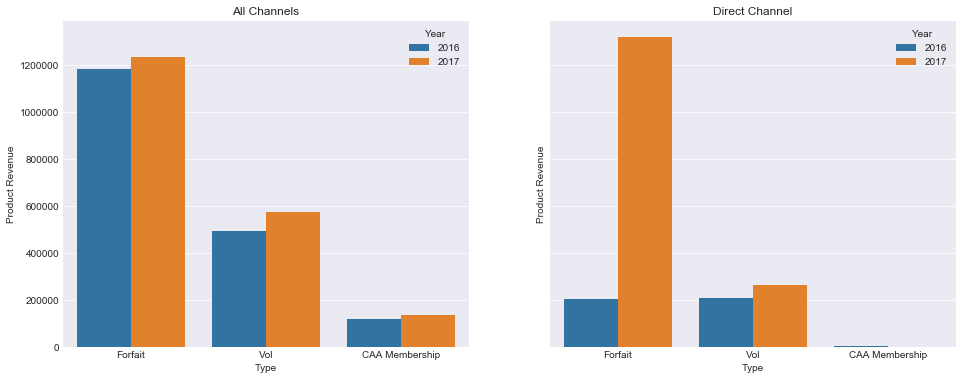

In [41]:
f,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(16,6))
#ax1.set_xticklabels(rotation=50)
sns.barplot("Type","Product Revenue",hue="Year",data=all_df,ax=ax1,estimator=sum,ci=None)
ax1.set_title("All Channels")
sns.barplot("Type","Product Revenue",hue="Year",data=direct_df,ax=ax2,estimator=sum,ci=None)
ax2.set_title("Direct Channel")